### Importing the needed libraries 

In [14]:
from cuqi.distribution import UserDefinedDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS

import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the module
from utilities import TableAutomization as TA
from cuqi.distribution import Distribution



# The banana distribution


In [15]:
def zero_fix(x):
    if 0.01 >= x >= 0:
        return 0.01
    if -0.01 <= x < 0:
        return -0.01
    return x


In [16]:


# logpdf = lambda x1, x2:  (- x1**2 +( np.sin(x2)**(-5) - x1)**2)/2


#threshold = lambda x: max(np.abs(np.sin(x[1])),0.001) * (np.positive(np.sin(x[1]))*2 -1)
logpdf = lambda x:  (- x[0]**2 +(zero_fix(np.sin(x[1]))**(-5) - x[0])**2)/2
gradient_x =  lambda x: np.array(- zero_fix(np.sin(x[1]))**(-5),-5 * zero_fix(np.sin(x[1]))**(-5) - x[0] * zero_fix(np.sin(x[1]))**(-6) * np.cos(x[1]))

target_sixmodal = UserDefinedDistribution(dim=2, logpdf_func=logpdf, gradient_func=gradient_x)

c:\Users\Ich\Desktop\CUQIpy 2024\CUQIpy-Benchmarks\utilities\TableAutomization.py:277: RuntimeWarning: overflow encountered in exp
  distb_pdf[ii,jj] = np.exp(distb.logd(np.array([grid1[ii,jj], grid2[ii,jj]])))
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:463: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:468: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


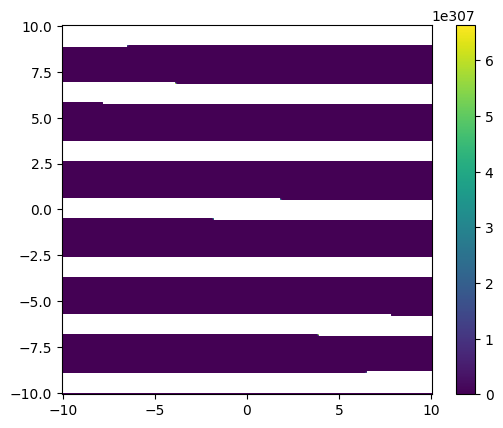

In [17]:
TA.plot_pdf_2D(target_sixmodal, -10, 10, -10, 10)

In [18]:
logpdf =  lambda x:  (- x[0] - x[1])
gradient_x =  lambda x: np.array([-1, -1])
target_sum = UserDefinedDistribution(dim=2, logpdf_func=logpdf, gradient_func=gradient_x)

### Plotting the "banana"

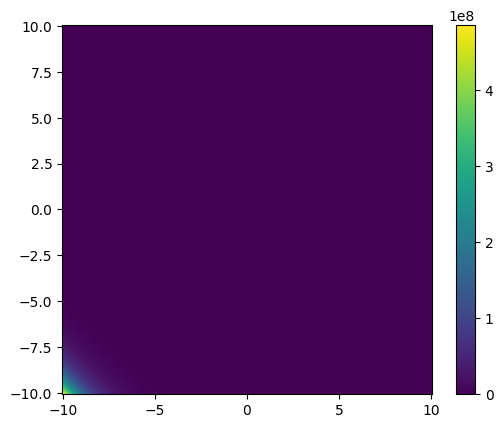

In [19]:
TA.plot_pdf_2D(target_sum, -10, 10, -10, 10)

## 1. First Example 


- Compute sampling methods with the followig parameters

1. __MH_fixed__ : scale = 0.05, Ns = 10000, Nb = 0
2. __MH_adapted__:  scale = 0.05, Ns = 8500, Nb = 1500
3.  __ULA__: scale = 0.065, Ns = 10000, Nb = 0
4.  __MALA__: scale = 0.065, Ns = 10000, Nb = 5000
5. __NUTS__: scale = 0.05, Ns = 1000, Nb = 100


In [20]:
df , (fig, axs) = TA.create_comparison(target_sixmodal, [0.05, 0.05, 0.065, 0.065, 0.05 ], [10000, 8500, 10000, 10000, 1000],[0, 1500, 0, 5000, 100], x0 = np.array([1, 1]), seed = 12)

Sample 10000 / 10000

Average acceptance rate: 0.0412 

Sample 10000 / 10000

Average acceptance rate: 0.07423529411764705 MCMC scale: 0.02065019665177163 

Sample 10000 / 10000
Sample 15000 / 15000
Sample 1100 / 1100


c:\Users\Ich\Desktop\CUQIpy 2024\CUQIpy-Benchmarks\utilities\TableAutomization.py:277: RuntimeWarning: overflow encountered in exp
  distb_pdf[ii,jj] = np.exp(distb.logd(np.array([grid1[ii,jj], grid2[ii,jj]])))
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\colorbar.py:1098: RuntimeWarning: overflow encountered in add
  self._values = 0.5 * (self._boundaries[:-1] + self._boundaries[1:])
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\ticker.py:2119: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\ticker.py:2159: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\ticker.py:755: RuntimeWarning: overflow encountered in scalar power
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\ticker.py:756: RuntimeWarning: overflow encou

OverflowError: cannot convert float infinity to integer

c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:463: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:468: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:499: RuntimeWarning: invalid value encountered in divide
  A_scaled /= ((a_max - a_min) / frac)
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:513: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:514: RuntimeWarning: invalid value encountered in multiply
  vrange *= ((a_max - a_min) / frac)


Error in callback <function _draw_all_if_interactive at 0x00000267566D44A0> (for post_execute), with arguments args (),kwargs {}:


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 1800x1200 with 10 Axes>

- Print table

In [ ]:
TA.print_table(df)

+------------+---------+----------+-------+---------+---------+-------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  | LogPDF | Gradient |
+------------+---------+----------+-------+---------+---------+-------+--------+----------+
|  MH_fixed  |  10000  |    0     |  0.05 |  1.293  |  1.486  | 0.972 | 10000  |    0     |
| MH_adapted |   8500  |   1500   |  0.05 |  1.295  |  1.295  | 0.795 | 10000  |    0     |
|    ULA     |  10000  |    0     | 0.065 |  1.295  |  1.295  |  1.0  | 10000  |  10000   |
|    MALA    |  10000  |   5000   | 0.065 |  1.295  |  1.295  |  1.0  | 15000  |  15000   |
|    NUTS    |   1000  |   100    |  0.05 |  1000.0 |  1000.0 | 0.001 |  1139  |   1139   |
+------------+---------+----------+-------+---------+---------+-------+--------+----------+


Observations:
- the conclusions are quite similar to the donut distributin: 
    - The MH_fixed is a bad sampling method in this: the sample are correlated 
    - the MH_adapted is still not great, however, one can see the improvement in the ESS value, also AR is lower, which might be due to adapting the scale to a higher one. 
    - Neither of these use gradient, thus the number of computed Gradients is 0
    - the ULA method shows a good ESS; an accceptence rate of 1.0, this is expected since ULA does not have the choice of declining a step
    - MALA improves upon ULA with a more balanced ESS but at the cost of increased computational complexity. 
    - NUTS: significantly outperforms other methods
- compared to donuts distribution, we can see that the NUTS sampling method has smaller comutational cost

- Now we will take a look at the samples of each method plotted onto the "banana" distribution graphs

c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:463: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
c:\miniconda\envs\cuqipy\Lib\site-packages\matplotlib\image.py:468: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


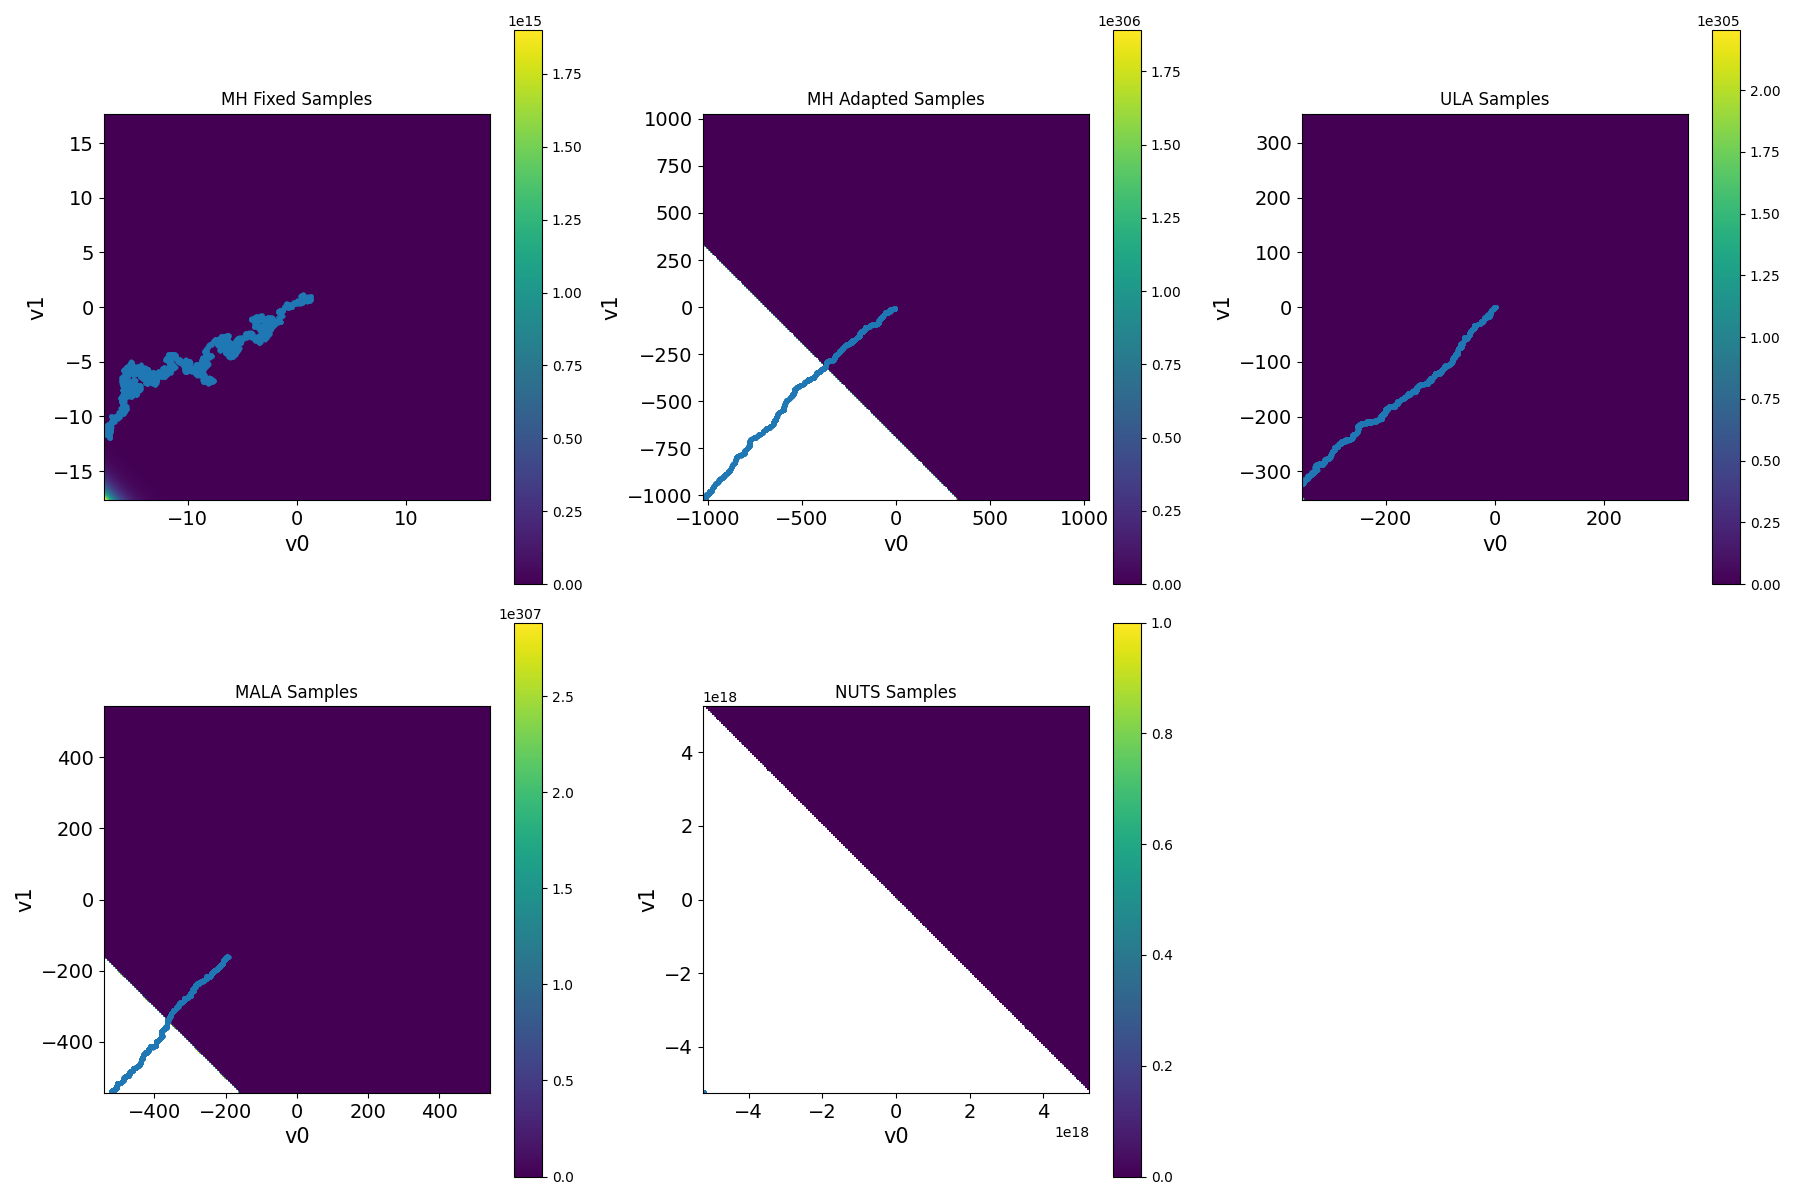

In [ ]:
TA.show_plot(fig)

_Observations_:
- From the graphs, the results from the table can be seen more clearly seen
- as expected the MH_fixed does not stray far away from the initial point 
- both MALA and NUTS provide quite an accurate sample representation 

## 2. Second example
In this example, we sample x0 from an initial dstribution, and we use the sam enumber of samples, burnins and the same scale for each method: 
- scale = 0.05
- Ns = 8500
- Nb = 1500

- Compute sampling methods

In [ ]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [ ]:
df, (fig, axs) = TA.create_comparison(target_sum, 0.05, 850, 150, x0 = y, seed = 12,chains=2)

Sample 1000 / 1000

Average acceptance rate: 0.9776470588235294 

Sample 1000 / 1000

Average acceptance rate: 0.82 MCMC scale: 1 

Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000


c:\Users\Ich\Desktop\CUQIpy 2024\CUQIpy-Benchmarks\utilities\TableAutomization.py:277: RuntimeWarning: overflow encountered in exp
  distb_pdf[ii,jj] = np.exp(distb.logd(np.array([grid1[ii,jj], grid2[ii,jj]])))


Sample 1000 / 1000

Average acceptance rate: 0.9776470588235294 

Sample 1000 / 1000

Average acceptance rate: 0.82 MCMC scale: 1 

Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000


c:\miniconda\envs\cuqipy\Lib\site-packages\arviz\stats\diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


- Print table

In [ ]:
TA.print_table(df)

+------------+---------+----------+-------+---------+---------+-------+----------+----------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  | Rhat(v0) | Rhat(v1) | LogPDF | Gradient |
+------------+---------+----------+-------+---------+---------+-------+----------+----------+--------+----------+
|  MH_fixed  |   850   |   150    |  0.05 |  1.312  |  1.334  | 0.978 |  1.823   |  1.806   |  1000  |    0     |
| MH_adapted |   850   |   150    |  0.05 |  1.306  |  1.309  |  0.82 |  1.827   |  1.827   |  1000  |    0     |
|    ULA     |   850   |   150    |  0.05 |  1.303  |   1.31  |  1.0  |  1.827   |  1.811   |  1000  |   1000   |
|    MALA    |   850   |   150    |  0.05 |  1.306  |  1.305  |  1.0  |  1.827   |  1.825   |  1000  |   1000   |
|    NUTS    |   850   |   150    |  0.05 |  850.0  |  850.0  | 0.001 |    -     |    -     |  1034  |   1034   |
+------------+---------+----------+-------+---------+---------+-------+----------+------

Observations:
- the  MH_fixed performs quite poorly, as ESS is very low, RHat strays from 1 and the AR is too high
- however, unlike in the donut distribution, the MH_adapted, performs better than expected, with Rhat close to 1.0 (converges well) and ESS, especially ESS(v1), is quite high 
- ULA has acceptence rate AR=1.0, as expected, and it performs well, with ESS parameters not too high but higher than MH, also R_hat is close to 1, meaing that it converges well enough
- MALA performs decently, but NUTS outperforms all the methods, but the computational costs are at least 4 times higher

- Create distribution images  

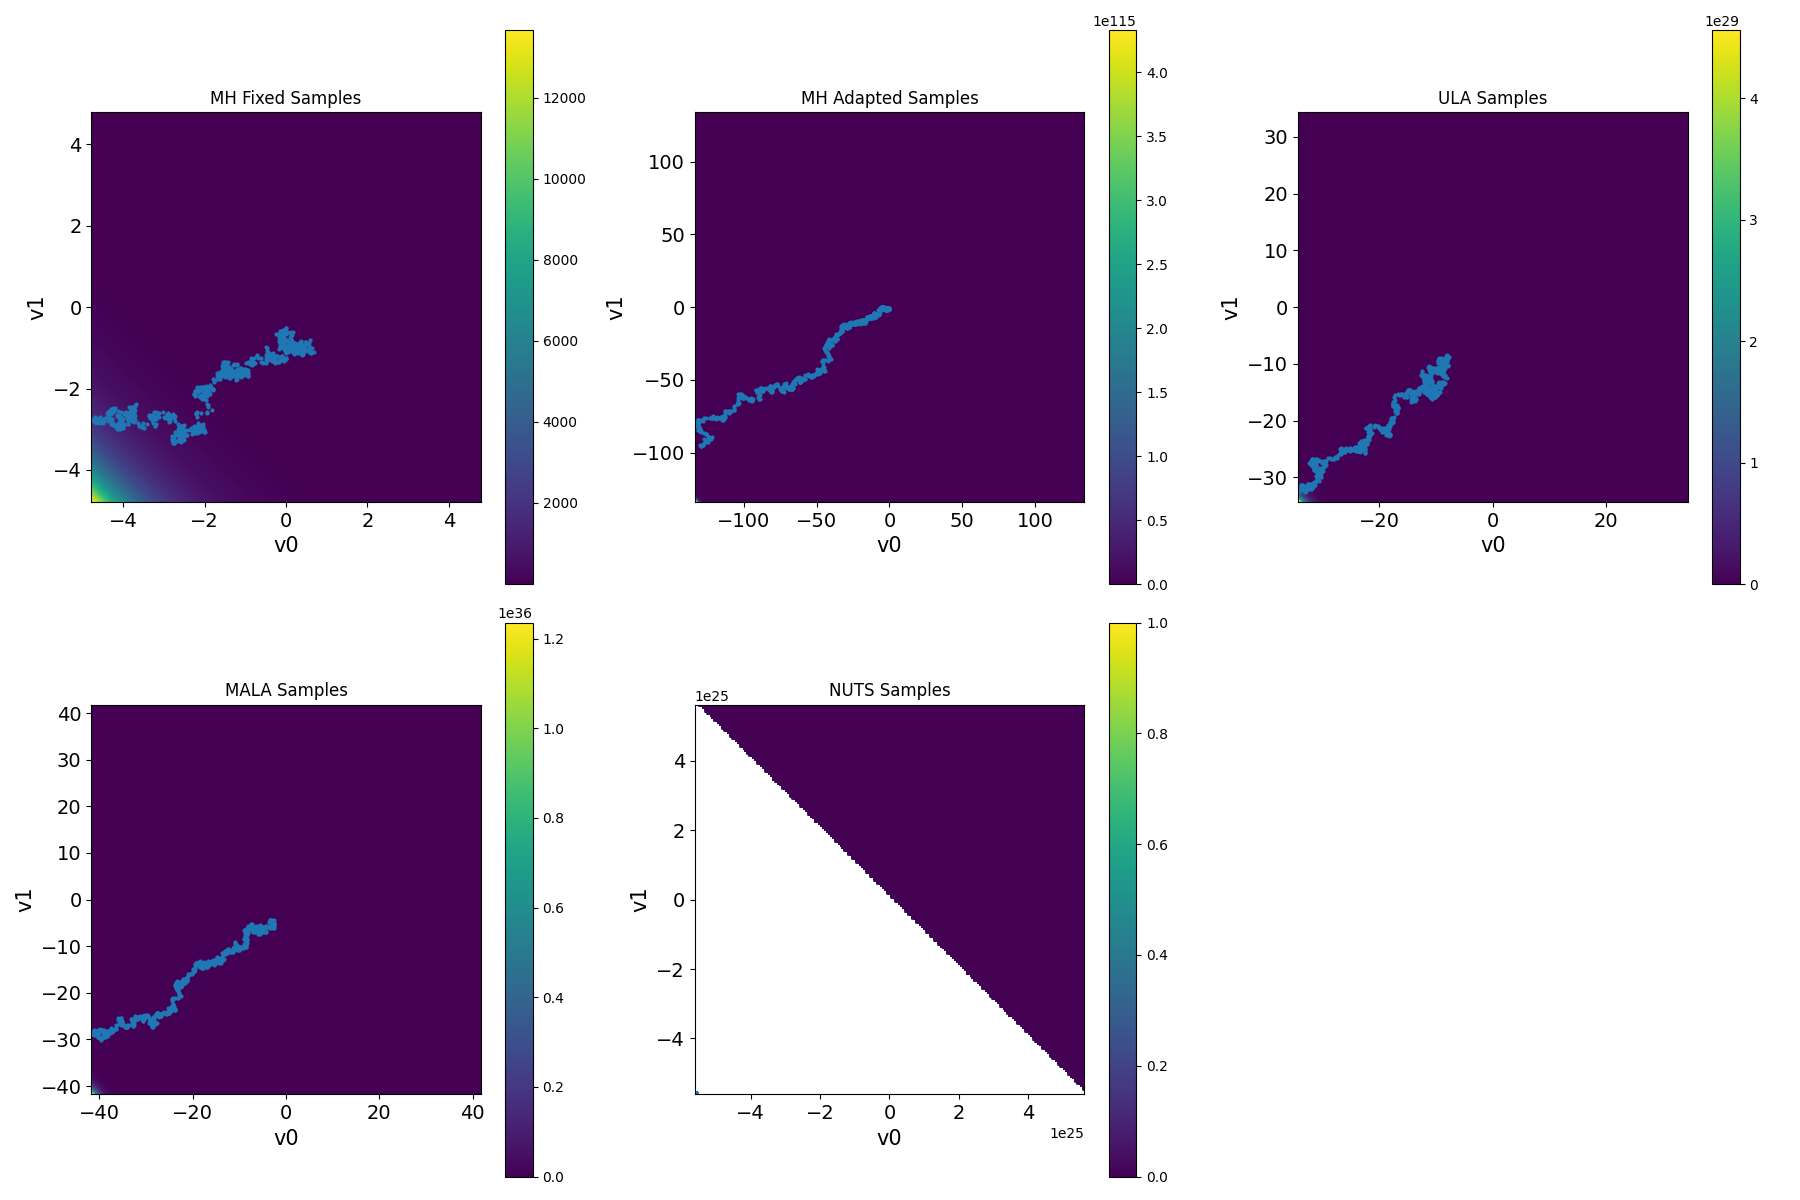

In [ ]:
TA.show_plot(fig)

_Observations_
- as expected the MH_fixed stays quite close to the initial point  
- compared to the previous graphss,it can be seen that setting a relatively high number of burn ins will lead to better results 